# La Regression

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [56]:
m = 200
X = np.linspace(0, 10, m).reshape(m, 1)
y = X + np.random.randn(m, 1)

In [57]:
model = LinearRegression()
model.fit(X, y)
model.score(X, y)

0.9035664375107577

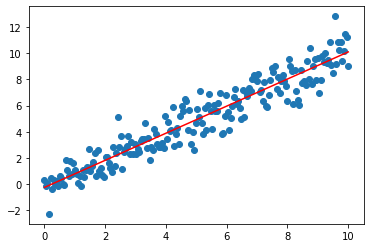

In [58]:
prediction = model.predict(X)

plt.scatter(X, y)
plt.plot(X, prediction, c='r')
plt.show()

In [59]:
n = 100
A = np.linspace(0, 10, n).reshape(n, 1)
B = A**2 + np.random.randn(n, 1)

In [60]:
from sklearn.svm import SVR

In [61]:
model = SVR(C=100)
model.fit(A, B)
model.score(A, B)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9991639818712091

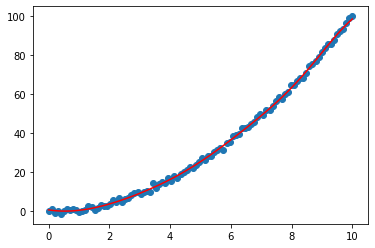

In [62]:
pre = model.predict(A)
plt.scatter(A, B)
plt.plot(A, pre, c='r')

# La classification

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
titanic = pd.read_excel('titanic3.xls')

In [65]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [66]:
titanic.shape

(1309, 14)

In [67]:
titanic = titanic[['pclass', 'survived', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic.head()

,pclass,survived,sex,age
0,1,1,1,29.0000
1,1,1,0,0.9167
2,1,0,1,2.0000
3,1,0,0,30.0000
4,1,0,1,25.0000


In [68]:
Y = titanic['survived']
Y

0       1
1       1
2       0
3       0
4       0
       ..
1301    0
1304    0
1306    0
1307    0
1308    0
Name: survived, Length: 1046, dtype: int64

In [69]:
X = titanic.drop('survived', axis=1)
X

,pclass,sex,age
0,1,1,29.0000
1,1,0,0.9167
2,1,1,2.0000
3,1,0,30.0000
4,1,1,25.0000
...,...,...,...
1301,3,0,45.5000
1304,3,1,14.5000
1306,3,0,26.5000
1307,3,0,27.0000


In [70]:
model = KNeighborsClassifier()
model.fit(X, Y)
model.score(X, Y)

0.8279158699808795

In [74]:
def survie(model, pclass=1, sex=0, age=26):
    x = np.array([pclass, sex, age]).reshape(1, 3)
    print(model.predict(x))
    print(model.predict_proba(x))
    
    
survie(model)

[1]
[[0.2 0.8]]


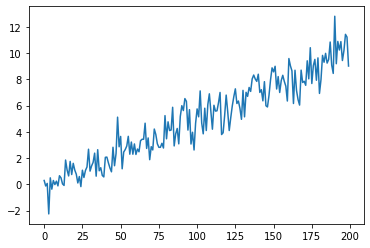

In [87]:
plt.plot(Y)